In [27]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Define a transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


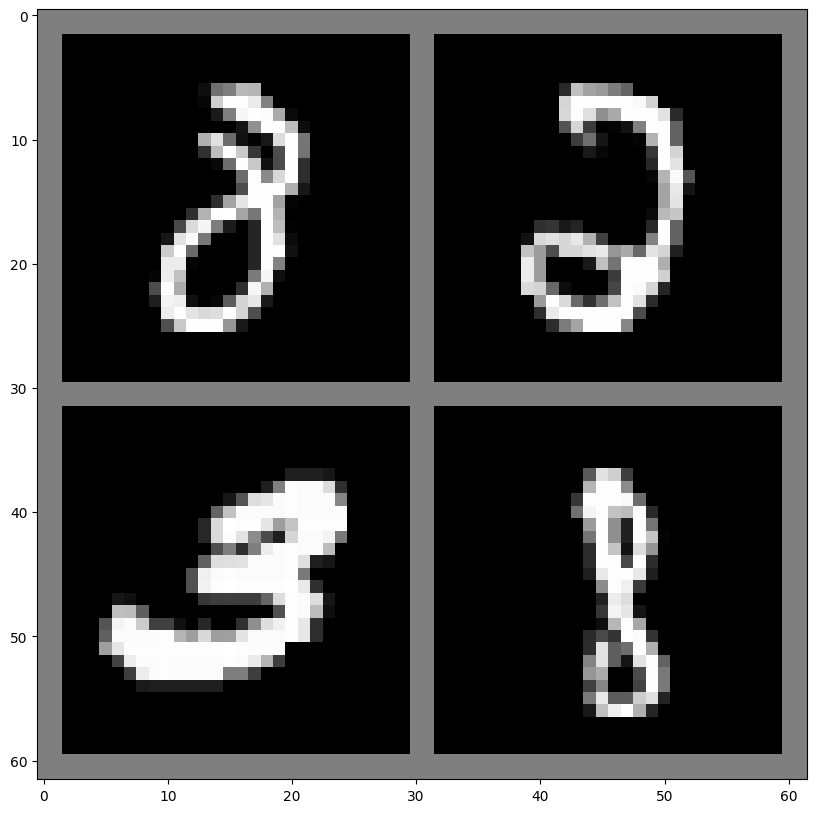

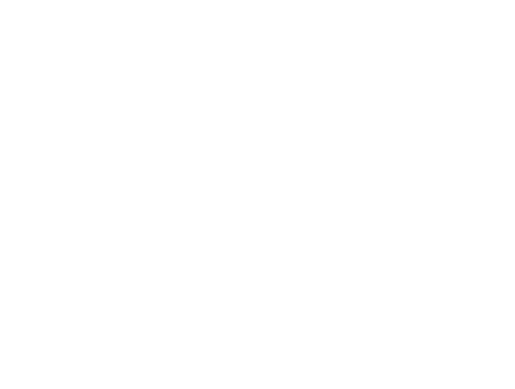

In [26]:
# let's show some of the images in the dataset
import torchvision

def imshow(img):
    # img is a torch tensor, so convert it to a numpy array after denormalization
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert from Tensor image
    plt.show()
    
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images in a grid
plt.figure(figsize=(10, 10))  # Set the figure size for better visibility
imshow(torchvision.utils.make_grid(images[:4], nrow=2))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [3]:
class MNISTNetwork(nn.Module):
    def __init__(self):
        super(MNISTNetwork, self).__init__()
        self.hidden = nn.Linear(784, 256)  # 28x28 = 784 input pixels, 256 outputs
        self.output = nn.Linear(256, 10)   # 10 output units for 10 classes
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten the images
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

# Create the network
model = MNISTNetwork()


In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [14]:


epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 1.682666209651463
Training loss: 0.8168541670862292
Training loss: 0.5716605792358231
Training loss: 0.4758968580760427
Training loss: 0.42519174487606043
Training loss: 0.39362197577444985
Training loss: 0.37197302788623104
Training loss: 0.35584060105878407
Training loss: 0.34312510461822504
Training loss: 0.3330684964463655
Training loss: 0.32436909250168405
Training loss: 0.31692451578594727
Training loss: 0.3101521505634668
Training loss: 0.3042210640906017
Training loss: 0.29875197523692526


In [18]:
# Initialize counters for correct predictions and total predictions
correct_count, all_count = 0, 0

# Iterate through each batch of images and labels in the test dataset
for images, labels in testloader:
    # Iterate through each image and corresponding label in the batch
    for i in range(len(labels)):
        # Disable gradient calculation to speed up the process and reduce memory usage
        with torch.no_grad():
            # Model inference: pass the image through the model to get the predicted probabilities for each class
            # .view(1, 784) reshapes the image to the appropriate batch size and input dimensions required by the model
            logps = model(images[i].view(1, 784))

        # Convert the log probabilities to actual probabilities for easier interpretation
        ps = torch.exp(logps)
        # Convert the tensor to a numpy array and get the first item (since batch size is 1, there is only one item)
        probab = list(ps.numpy()[0])
        # Find the predicted label by finding the index of the highest probability
        pred_label = probab.index(max(probab))
        # Get the true label for the current image from the batch
        true_label = labels.numpy()[i]
        # Check if the predicted label matches the true label
        if true_label == pred_label:
            # If correct, increment the correct prediction count
            correct_count += 1
        # Always increment the total count
        all_count += 1

# Print the total number of images tested
print("Number Of Images Tested =", all_count)
# Calculate and print the model accuracy
print("\nModel Accuracy =", (correct_count / all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9196
